# **データの集計**

6.1 クロス集計

In [3]:
# 必要ライブラリのインポート
import pandas as pd

In [4]:
# master_customerをdfに取り込み、df にあるgenderとregionをクロス集計
master_customer = pd.read_csv("master_customer.csv", dtype={'customer_id': str})
df = master_customer

# genderとregionのクロス集計
cross_tab = pd.crosstab(df['gender'], df['region'])
cross_tab

region,京都府,佐賀県,北海道,和歌山県,埼玉県,大分県,大阪府,奈良県,宮城県,富山県,...,神奈川県,福岡県,秋田県,茨城県,長野県,青森県,静岡県,高知県,鳥取県,鹿児島県
gender,,,,,,,,,,,,,,,,,,,,,
0.0,226,127,249,119,255,136,365,131,134,119,...,276,273,101,241,135,124,127,128,115,123
1.0,147,88,154,76,161,72,229,73,80,79,...,134,168,81,158,70,79,76,77,81,83
2.0,5,1,8,3,4,3,9,2,0,2,...,1,3,3,6,2,1,2,1,3,1


6.2 データ件数の集計

In [ ]:
# 必要ライブラリのインポート
import pandas as pd

In [13]:
# データを読み込む
transaction_history = pd.read_csv("transaction_history.csv", dtype={'customer_id': str})

# 顧客IDごとの行数（購買回数）を集計
customer_purchase_counts = transaction_history['customer_id'].value_counts().reset_index()
customer_purchase_counts.columns = ['customer_id', 'purchase_count']

# 結果の表示
customer_purchase_counts

,customer_id,purchase_count
0,00287092,15
1,00287091,15
2,00284810,15
3,00284826,15
4,00284809,15
...,...,...
277230,00287220,1
277231,00287219,1
277232,00287218,1
277233,00287217,1


6.3 Recencyの集計

In [14]:
# purchase_dateをdatetime型に変換, エラーになる場合は無視して処理を続行
transaction_history['purchase_date'] = pd.to_datetime(transaction_history['purchase_date'], errors='coerce')

# エラーになる行を確認 (purchase_dateがNaTになっている行)
error_rows = transaction_history[transaction_history['purchase_date'].isnull()]
# print(f"Error rows:\n{error_rows}") ここは必要に応じて実行

# customer_idごとにpurchase_dateの最新日付を取得
latest_purchase_dates = transaction_history.groupby('customer_id')['purchase_date'].max().reset_index()

# 結果を表示
latest_purchase_dates.head()

,customer_id,purchase_date
0,00010000,2018-11-30
1,00010001,2021-10-18
2,00010002,2018-01-15
3,00010003,2018-03-27
4,00010004,2024-12-07


6.4 分布の確認

In [15]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 58.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=6b8d07527f5420700477a5fe97efa2d00bbaf549cac50e6e8bafe293a77e1901
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


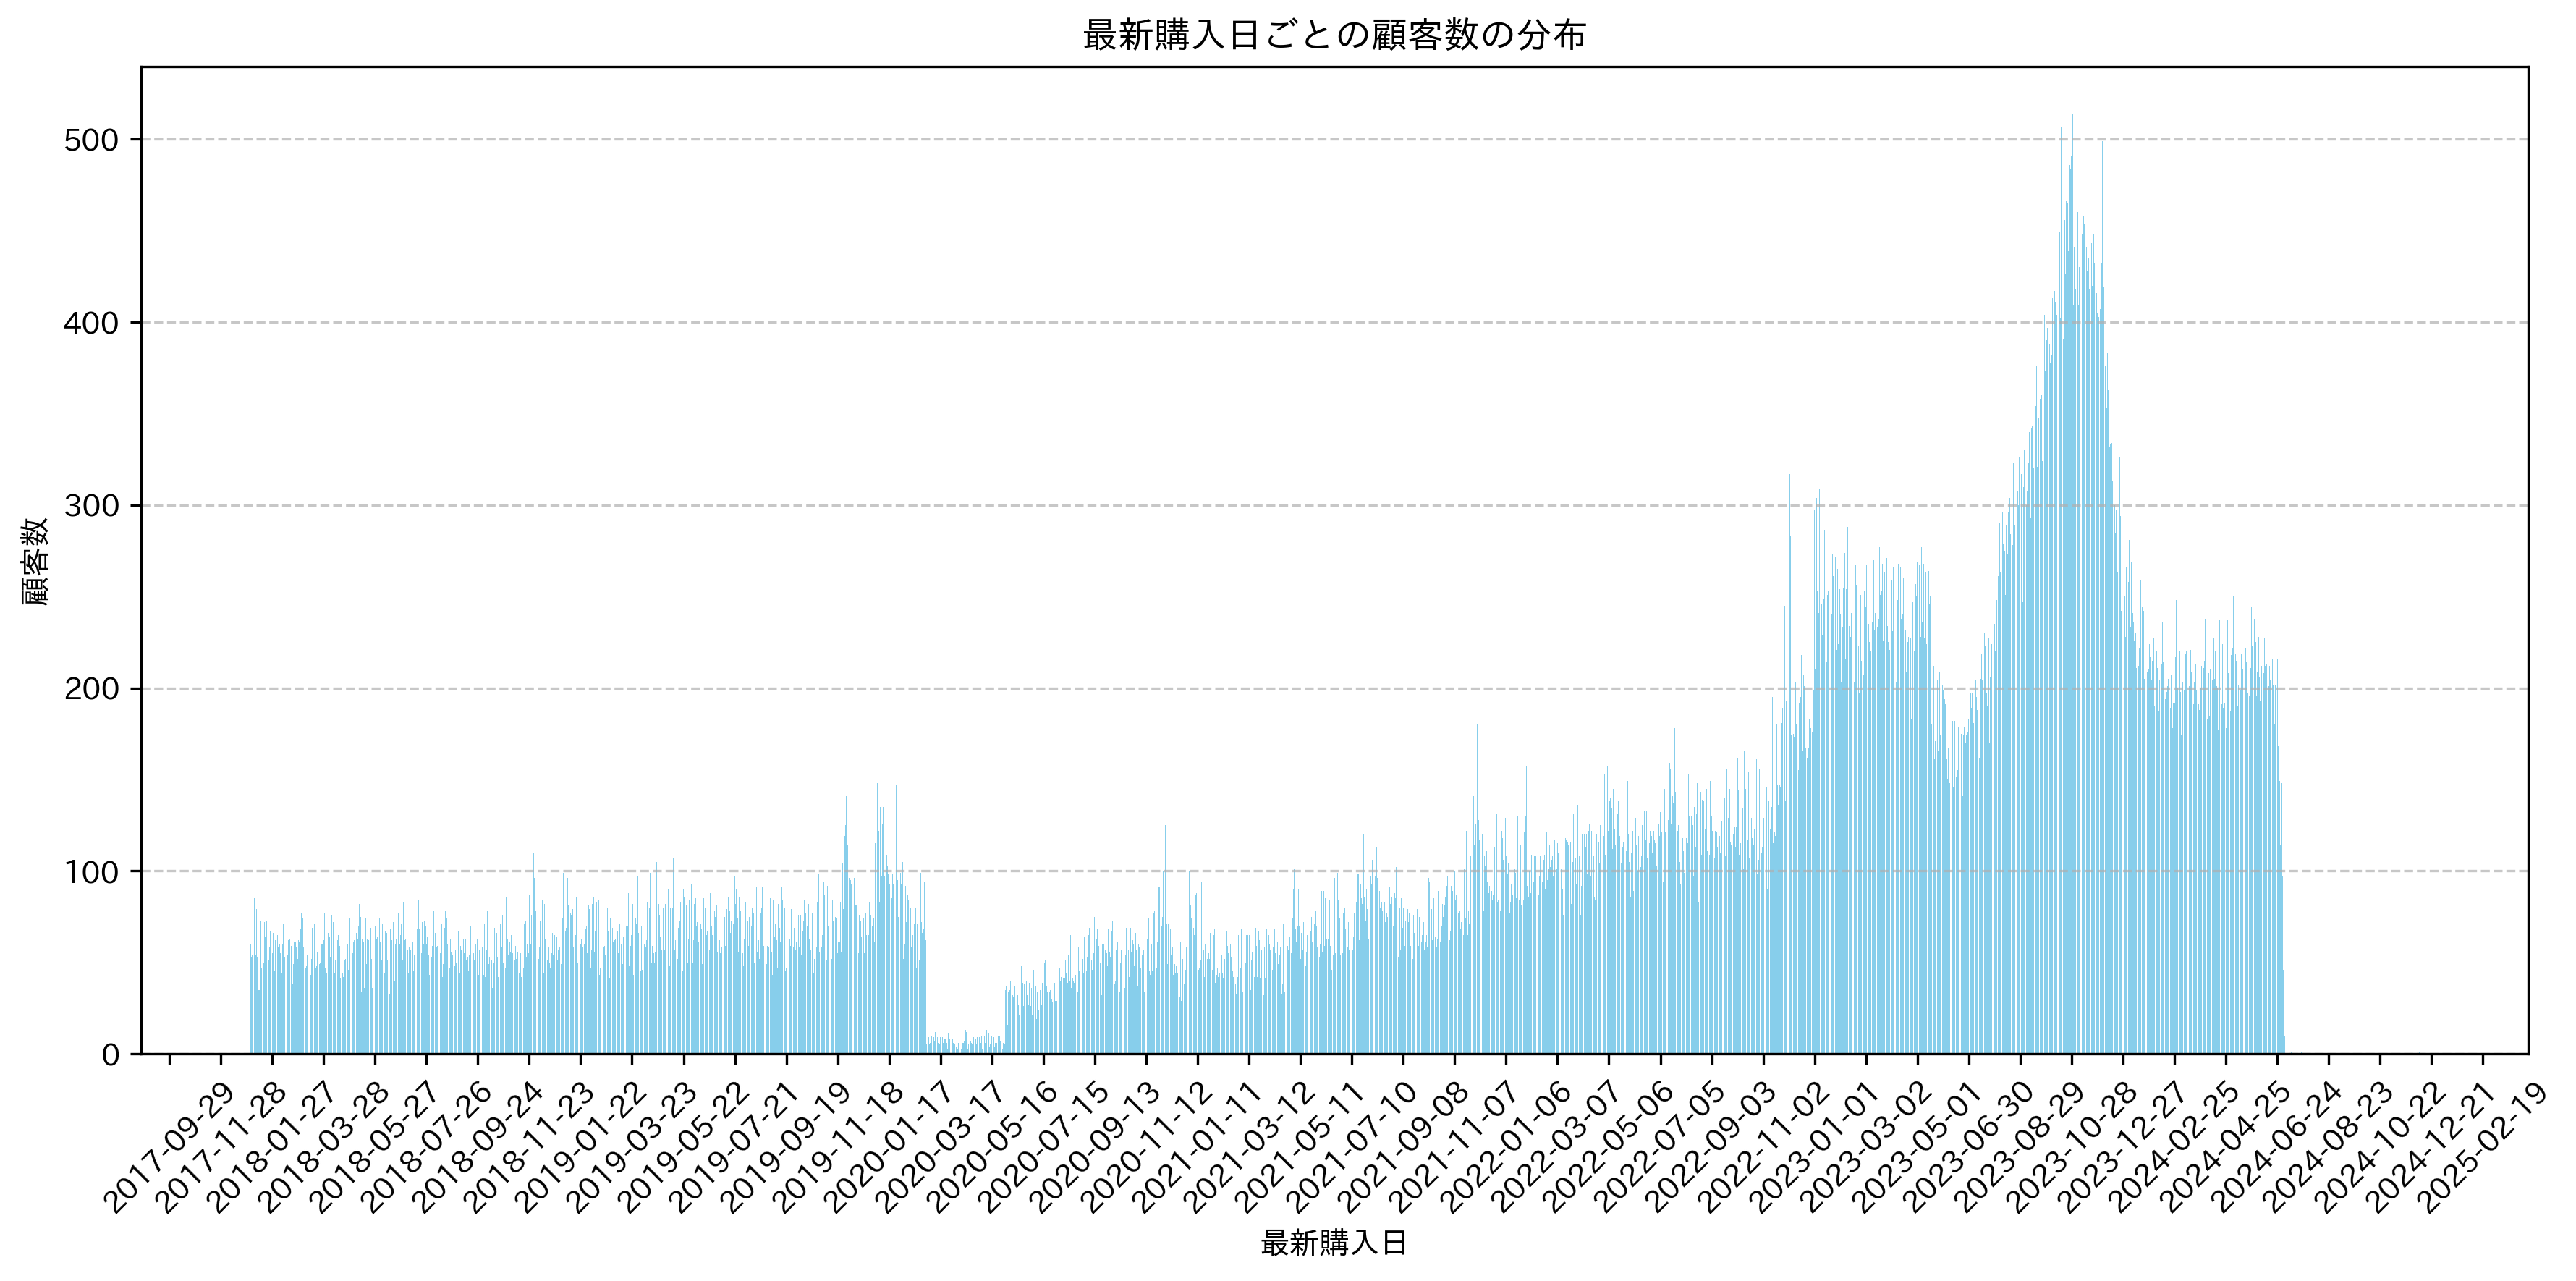

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import japanize_matplotlib
import pandas as pd

# 最新購入日の分布を集計
purchase_date_counts = latest_purchase_dates['purchase_date'].value_counts().reset_index()
purchase_date_counts.columns = ['purchase_date', 'count']

# 日付順にソート
purchase_date_counts = purchase_date_counts.sort_values(by='purchase_date')

# 日付をdatetime型に変換（必要に応じて）
purchase_date_counts['purchase_date'] = pd.to_datetime(purchase_date_counts['purchase_date'])

# 可視化
plt.figure(figsize=(12, 6), dpi=300)
plt.bar(purchase_date_counts['purchase_date'],
        purchase_date_counts['count'],
        color='skyblue')

# 60日ごとの目盛りを設定
locator = mdates.DayLocator(interval=60)
formatter = mdates.DateFormatter('%Y-%m-%d')

plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)
plt.xlabel("最新購入日")
plt.ylabel("顧客数")
plt.title("最新購入日ごとの顧客数の分布")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

6.5 Frequencyの集計

In [17]:
import pandas as pd
# データをCSVから読み込む（ファイル名は適宜変更）
transaction_history = pd.read_csv("transaction_history.csv", dtype={'customer_id': str})

# purchase_dateをdatetime型に変換、エラーを無視して処理を続行
# errors='coerce'を指定することで、不正な日付をNaT（Not a Time）に変換します
transaction_history["purchase_date"] = pd.to_datetime(transaction_history["purchase_date"], errors='coerce')

# エラーになった行を確認 (purchase_dateがNaTになっている行)
error_rows = transaction_history[transaction_history['purchase_date'].isnull()]
# print(f"Error rows:\n{error_rows}")

# customer_idごとにpurchase_dateの件数をカウント
order_counts = transaction_history.groupby("customer_id")["purchase_date"].count().reset_index()
order_counts.columns = ["customer_id", "freqency"]

# 結果を表示
order_counts.head()

,customer_id,freqency
0,00010000,1
1,00010001,1
2,00010002,1
3,00010003,1
4,00010004,1


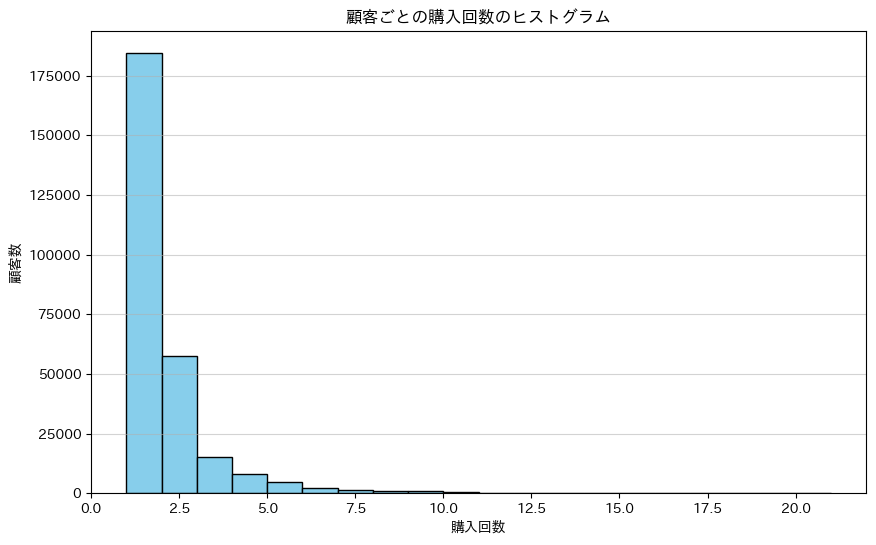

In [18]:
# Freaqueancyのヒストグラムを描画
plt.figure(figsize=(10, 6))
plt.hist(order_counts['freqency'], bins=list(range(1, 22)), color='skyblue', edgecolor='black')
plt.xlabel('購入回数')
plt.ylabel('顧客数')
plt.title('顧客ごとの購入回数のヒストグラム')
plt.grid(axis='y', alpha=0.55)
plt.show()

6.6 Monetaryの集計

In [19]:
# 必要なライブラリのインポート
import pandas as pd

# データの読み込み
transaction_history = pd.read_csv("transaction_history.csv", dtype={'customer_id': str})
# customer_idごとにpurchase_amountの合計を計算
customer_purchase_sum = transaction_history.groupby('customer_id')['purchase_amount'].sum().reset_index(name='Monetary')

# 結果の表示
customer_purchase_sum.head()

,customer_id,Monetary
0,00010000,9300
1,00010001,8300
2,00010002,164700
3,00010003,46000
4,00010004,69300


6.7 Monetaryの分布の確認

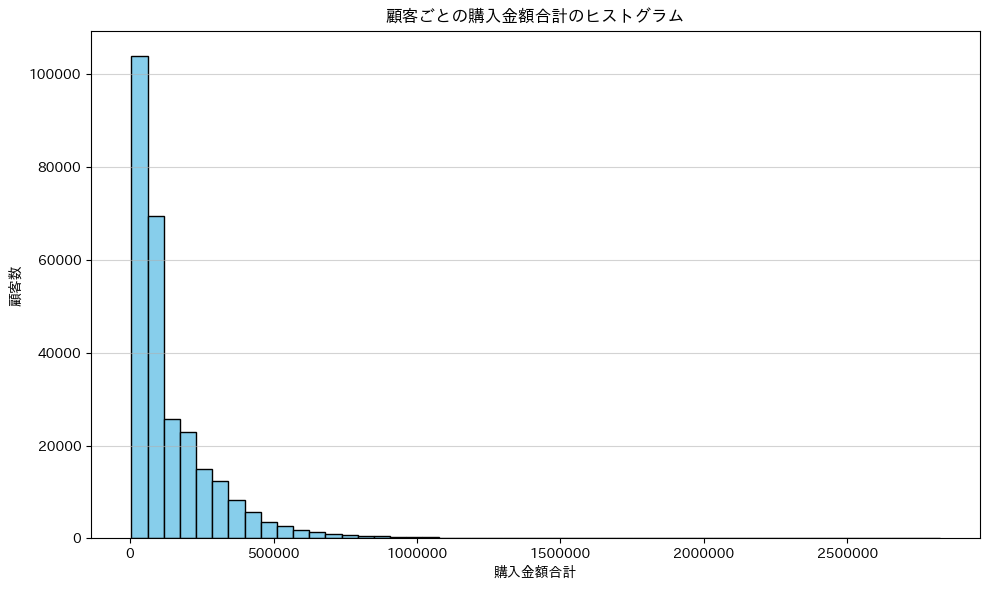

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(customer_purchase_sum['Monetary'], bins=50, color='skyblue', edgecolor='black')
ax.ticklabel_format(style='plain', axis='x')
ax.set_xlabel('購入金額合計')
ax.set_ylabel('顧客数')
ax.set_title('顧客ごとの購入金額合計のヒストグラム')
ax.grid(axis='y', alpha=0.55)
plt.tight_layout()
plt.show()


6.8 Monetaryの基本統計量算出

count    277235.00
mean     139575.82
std      170363.29
min        5000.00
25%       10500.00
50%       86600.00
75%      194700.00
max     2821700.00
Name: Monetary, dtype: float64


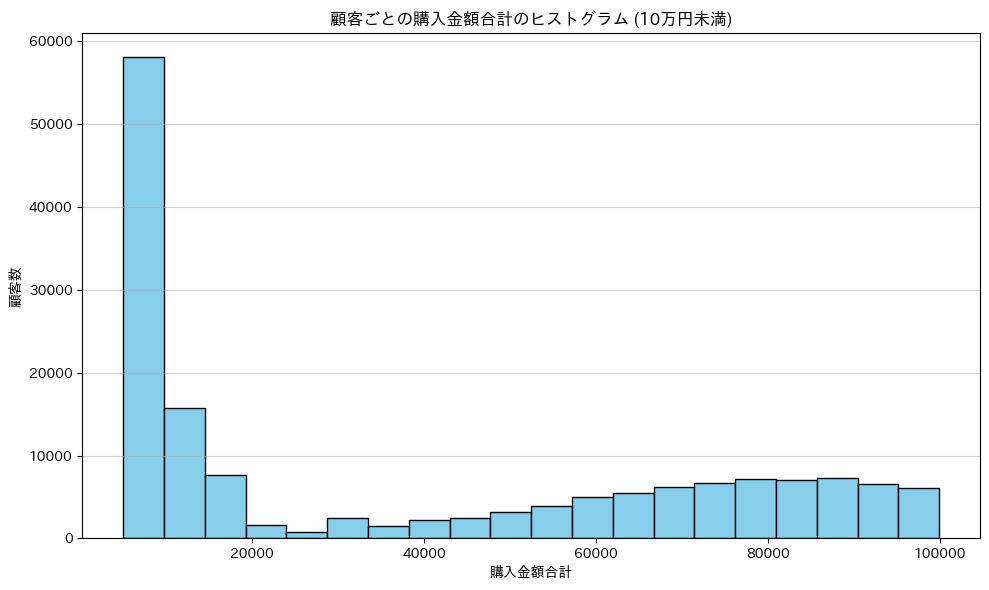

In [21]:
# customer_purchase_sumの、purchase_amountの基本統計量算出。
pd.set_option('display.float_format', '{:.2f}'.format)
print(customer_purchase_sum['Monetary'].describe())
pd.reset_option('display.float_format')

# 10万円（100000円）よりも小さな値のみをフィルタリング
monetary_filtered = customer_purchase_sum[customer_purchase_sum['Monetary'] < 100000]

# フィルタリングされたデータでヒストグラムを描画
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(monetary_filtered['Monetary'], bins=20, color='skyblue', edgecolor='black')
ax.ticklabel_format(style='plain', axis='x')
ax.set_xlabel('購入金額合計')
ax.set_ylabel('顧客数')
ax.set_title('顧客ごとの購入金額合計のヒストグラム (10万円未満)')
ax.grid(axis='y', alpha=0.55)
plt.tight_layout()
plt.show()